**Problem Statement :**
Using the PIMA Indian Dataset ,the goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [29]:
#Importing Libraries
# for basic mathematics operation 
import pandas as pd
import numpy as np

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
# importing the dataset
df=pd.read_csv('/content/gdrive/My Drive/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [31]:
#.shape will give you over all Columns and rows associated with the dataset
df.shape 

(768, 9)

In [32]:
#.describe() summarizes the count, mean, standard deviation, min, and max for numeric variables.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
0.9016739791518588


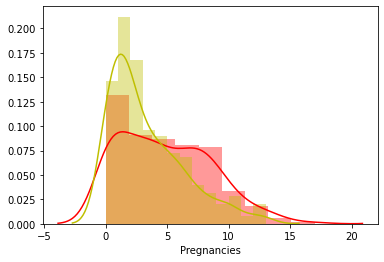

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
0.17375350179188992


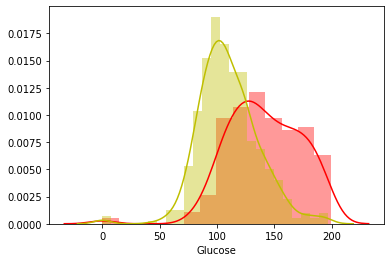

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
-1.8436079833551302


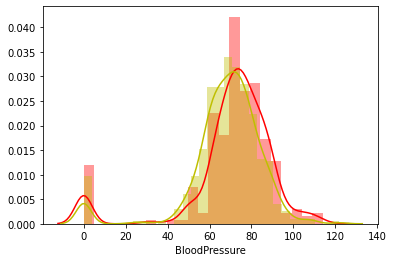

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
0.10937249648187608


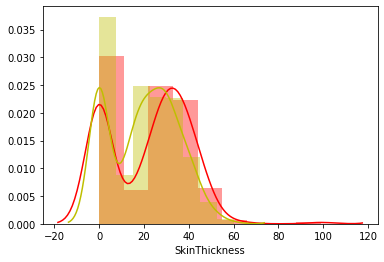

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
2.272250858431574


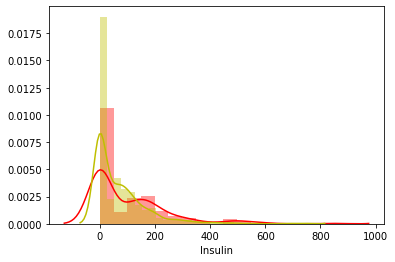

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
-0.42898158845356543


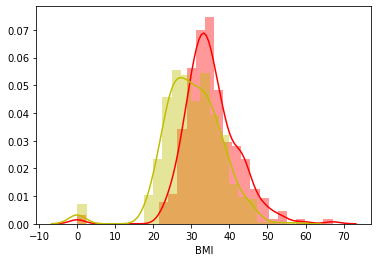

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64
1.919911066307204


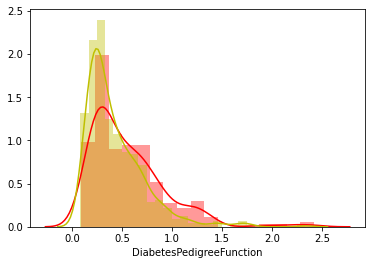

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64
1.1295967011444805


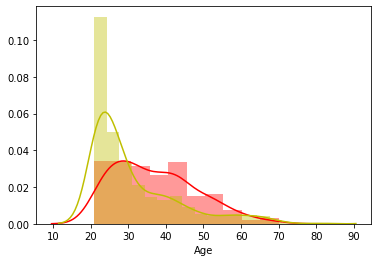

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64
0.635016643444986


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


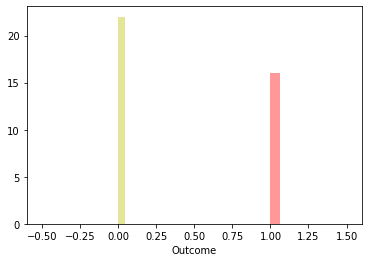

In [7]:
#Data Visualization
for i in df:
  print(df[i].describe())
  print(df[i].skew())
  sns.distplot(df[i][df["Outcome"]==1],color='r')
  sns.distplot(df[i][df["Outcome"]==0],color='y')
  plt.show()



1.  For Data Visualization ,here we have used Distplot for every independent variable on Dependnet Variable.
2.  Its gives a complete description of each variable. Such as its mean,max,Std,var.
3.  By anaysing the graph we can say that SkinThickness and BloodPressure columns are not that important as it slightly differs for diabetic and non-diabetic persons.   



In [37]:
df=df.drop('SkinThickness',axis=1)

In [38]:
df=df.drop("BloodPressure",axis=1)

In [39]:
#Splitting Dependent and Independent Variables into two different variables.
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [40]:
x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [41]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 6)
(614,)
(154, 6)
(154,)


Decision Tree


In [43]:
# Training the Decision Tree model on the Training set
from sklearn.tree import DecisionTreeClassifier,plot_tree
algo1=DecisionTreeClassifier(criterion='entropy',max_depth=4)
algo1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

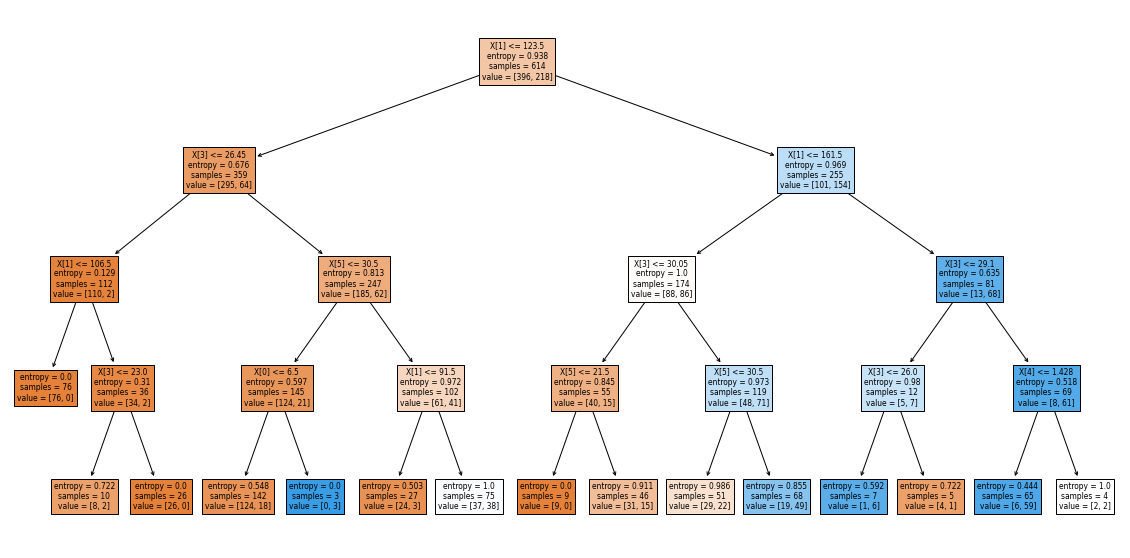

In [44]:
#Plotting  Decision Tree Graph
plt.figure(figsize=(20,10))
plot_tree(algo1,filled=True)
plt.show()

In [45]:
# Making the Confusion Matrix and Checking the Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
ypred=algo1.predict(x_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))

0.7272727272727273
[[81 23]
 [19 31]]


As we can see the accuracy of Decision Tree algorithm is 0.7272727272727273 which is an average , We can say that this algorithm fits the best for PIMA Data set

In [47]:
#Saving the trained model
import joblib

In [49]:
#Saving trained model into folder
joblib.dump(algo1,r'/content/gdrive/My Drive/trainset_dia.pkl')

['/content/gdrive/My Drive/trainset_dia.pkl']

In [51]:
#Loading the trained model from the folder
model=joblib.load("/content/gdrive/My Drive/trainset_dia.pkl")

In [53]:
#New set of data for predicting result.
new=np.array([[3,155,93,28.1,0.164,34]])
df=pd.DataFrame(new)
model.predict(df)


array([0])

0 indicates that the person with the above set of values don't have Dibetes.